케라스 데이터셋 로이터 데이터의 일반적 딥러닝테스트 (더 깊게 테스트) ReuterDeep1.ipynb 에서 ReuterDeep2.ipynb ReuterDeep2.ipynb

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels)=reuters.load_data(num_words=10000, test_split=0.5)

len(train_data), len(test_data)

(8982, 2246)

In [2]:
word_index=reuters.get_word_index()
reverse_word_index=dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire=' '.join([reverse_word_index.get(i-3, '?') for i in train_data[5]])
print(decoded_newswire)

? the u s agriculture department estimated ? 1986 87 wheat crop at 31 85 mln tonnes vs 31 85 mln tonnes last month it estimated 1985 86 output at 24 25 mln tonnes vs 24 25 mln last month canadian 1986 87 ? grain production is projected at 27 62 mln tonnes vs 27 62 mln tonnes last month production in 1985 86 is estimated at 24 95 mln tonnes vs 24 95 mln last month canadian wheat exports in 1986 87 are forecast at 19 00 mln tonnes vs 18 00 mln tonnes last month exports in 1985 86 are estimated at 17 71 mln tonnes vs 17 72 mln last month reuter 3


In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension=1500):
	results=np.zeros((len(sequences), dimension))
	for i, sequence in enumerate(sequences):
		results[i, sequence]=1.
	return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46):
	results=np.zeros((len(labels), dimension))
	for i, label in enumerate(labels):
		results[i, label] =1.
	return results

one_hot_train_labels=to_one_hot(train_labels)
one_hot_test_labels=to_one_hot(test_labels)

from keras.utils.np_utils import to_categorical

one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)

In [5]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(1500,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

y_train = one_hot_train_labels
y_test = one_hot_test_labels 

history=model.fit(x_train, y_train, epochs=15, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/15
18/18 [==============================] - 1s 23ms/step - loss: 3.5945 - accuracy: 0.1905 - val_loss: 3.1136 - val_accuracy: 0.5285
Epoch 2/15
18/18 [==============================] - 0s 11ms/step - loss: 2.4669 - accuracy: 0.5519 - val_loss: 1.9256 - val_accuracy: 0.5815
Epoch 3/15
18/18 [==============================] - 0s 11ms/step - loss: 1.6731 - accuracy: 0.6138 - val_loss: 1.5874 - val_accuracy: 0.6429
Epoch 4/15
18/18 [==============================] - 0s 11ms/step - loss: 1.4019 - accuracy: 0.6774 - val_loss: 1.4164 - val_accuracy: 0.6781
Epoch 5/15
18/18 [==============================] - 0s 12ms/step - loss: 1.2300 - accuracy: 0.7090 - val_loss: 1.3294 - val_accuracy: 0.6870
Epoch 6/15
18/18 [==============================] - 0s 11ms/step - loss: 1.1087 - accuracy: 0.7318 - val_loss: 1.2757 - val_accuracy: 0.6963
Epoch 7/15
18/18 [==============================] - 0s 11ms/step - loss: 1.0058 - accuracy: 0.7568 - val_loss: 1.2244 - val_accuracy: 0.7124
Epoch 8/15
18

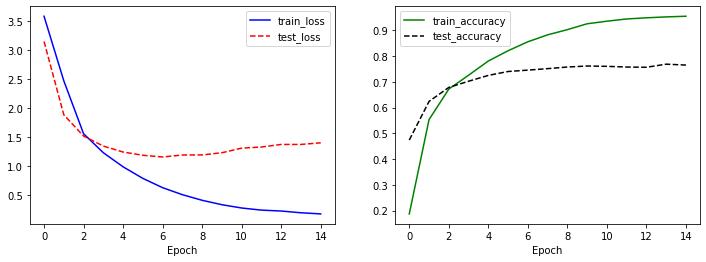

In [25]:
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']


epochs=range(1, len(loss)+1)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(loss, 'b-', label='train_loss')
plt.plot(val_loss, 'r--', label='test_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(acc, 'g-', label='train_accuracy')
plt.plot(val_acc, 'k--', label='test_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [26]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

y_train = one_hot_train_labels
y_test = one_hot_test_labels 

history=model.fit(x_train, y_train, epochs=15, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/15
18/18 [==============================] - 1s 44ms/step - loss: 3.4928 - accuracy: 0.2673 - val_loss: 2.9698 - val_accuracy: 0.4991
Epoch 2/15
18/18 [==============================] - 0s 27ms/step - loss: 2.4275 - accuracy: 0.5677 - val_loss: 1.9445 - val_accuracy: 0.6135
Epoch 3/15
18/18 [==============================] - 0s 27ms/step - loss: 1.5617 - accuracy: 0.6593 - val_loss: 1.4990 - val_accuracy: 0.6594
Epoch 4/15
18/18 [==============================] - 0s 27ms/step - loss: 1.1916 - accuracy: 0.7276 - val_loss: 1.3166 - val_accuracy: 0.7053
Epoch 5/15
18/18 [==============================] - 0s 27ms/step - loss: 0.9565 - accuracy: 0.7802 - val_loss: 1.2030 - val_accuracy: 0.7289
Epoch 6/15
18/18 [==============================] - 0s 27ms/step - loss: 0.7622 - accuracy: 0.8253 - val_loss: 1.1358 - val_accuracy: 0.7453
Epoch 7/15
18/18 [==============================] - 0s 27ms/step - loss: 0.6036 - accuracy: 0.8680 - val_loss: 1.0907 - val_accuracy: 0.7596
Epoch 8/15
18

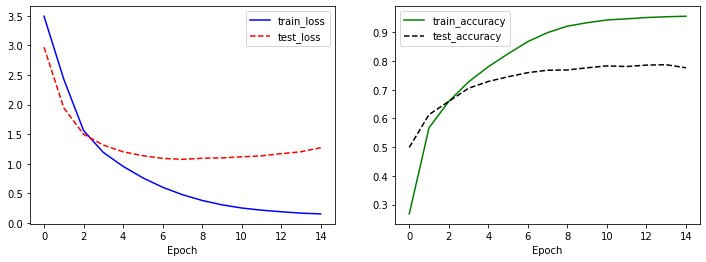

In [27]:
loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']


epochs=range(1, len(loss)+1)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(loss, 'b-', label='train_loss')
plt.plot(val_loss, 'r--', label='test_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(acc, 'g-', label='train_accuracy')
plt.plot(val_acc, 'k--', label='test_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [28]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

y_train = one_hot_train_labels
y_test = one_hot_test_labels 

history=model.fit(x_train, y_train, epochs=15, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/15
18/18 [==============================] - 1s 38ms/step - loss: 3.2361 - accuracy: 0.4241 - val_loss: 2.5061 - val_accuracy: 0.5254
Epoch 2/15
18/18 [==============================] - 0s 27ms/step - loss: 1.9819 - accuracy: 0.5923 - val_loss: 1.6575 - val_accuracy: 0.6425
Epoch 3/15
18/18 [==============================] - 0s 27ms/step - loss: 1.3576 - accuracy: 0.7066 - val_loss: 1.3505 - val_accuracy: 0.7004
Epoch 4/15
18/18 [==============================] - 0s 27ms/step - loss: 1.0655 - accuracy: 0.7705 - val_loss: 1.2080 - val_accuracy: 0.7320
Epoch 5/15
18/18 [==============================] - 0s 28ms/step - loss: 0.8633 - accuracy: 0.8193 - val_loss: 1.1162 - val_accuracy: 0.7578
Epoch 6/15
18/18 [==============================] - 0s 27ms/step - loss: 0.7006 - accuracy: 0.8569 - val_loss: 1.0522 - val_accuracy: 0.7738
Epoch 7/15
18/18 [==============================] - 0s 27ms/step - loss: 0.5670 - accuracy: 0.8855 - val_loss: 1.0069 - val_accuracy: 0.7827
Epoch 8/15
18

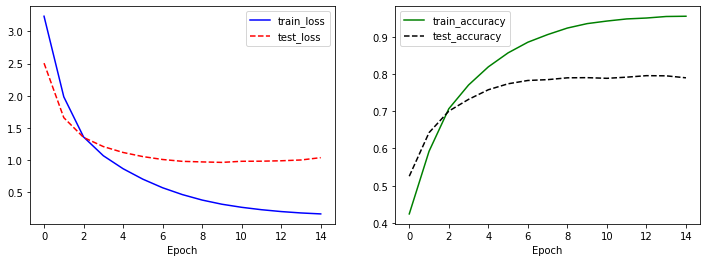

In [29]:
loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']


epochs=range(1, len(loss)+1)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(loss, 'b-', label='train_loss')
plt.plot(val_loss, 'r--', label='test_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(acc, 'g-', label='train_accuracy')
plt.plot(val_acc, 'k--', label='test_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()